In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [37]:
data = pd.read_csv("spotify_songs.csv")
print(data.dtypes)
data.head()

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [38]:
print(data.shape)
print(data.columns)
data.drop(["track_id","playlist_id","track_album_id"],inplace=True,axis=1)
data.columns


(32833, 23)
Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


Index(['track_name', 'track_artist', 'track_popularity', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [39]:
data.head()
data.dropna(inplace=True)
data.isnull().sum()

track_name                  0
track_artist                0
track_popularity            0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [40]:
data.drop_duplicates()
data.shape
data["track_artist"].value_counts()

track_artist
Martin Garrix       161
Queen               136
The Chainsmokers    123
David Guetta        110
Don Omar            102
                   ... 
Underworld            1
The Witches           1
Tess Parks            1
Mick Harvey           1
Mat Zo                1
Name: count, Length: 10692, dtype: int64

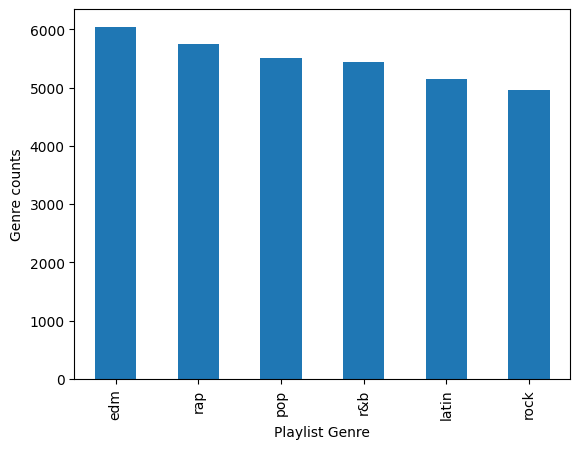

In [41]:
data["playlist_genre"].value_counts().plot(kind="bar")
plt.xlabel("Playlist Genre")
plt.ylabel("Genre counts")
plt.show()


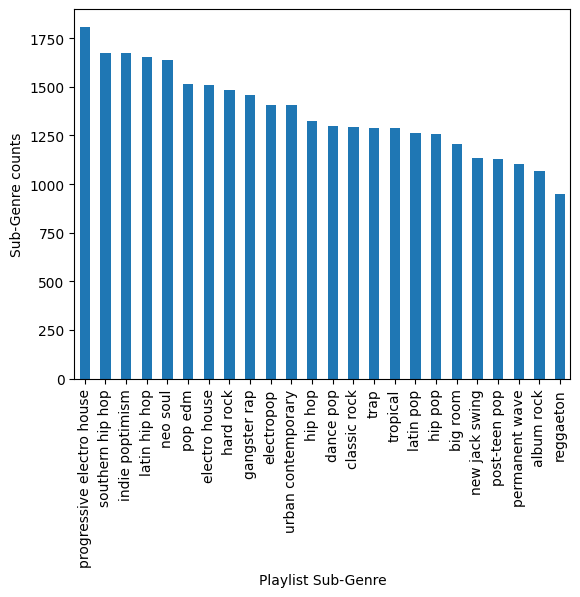

In [42]:
data["playlist_subgenre"].value_counts().plot(kind="bar")
plt.xlabel("Playlist Sub-Genre")
plt.ylabel("Sub-Genre counts")
plt.show()

<Axes: >

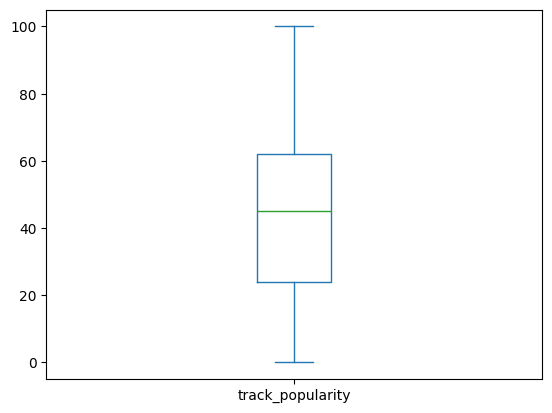

In [50]:
data.head()
data["track_popularity"].plot(kind="box")

In [44]:
data["duration_ms"] = np.ceil(data["duration_ms"]/1000)
data.rename(columns={"duration_ms":"duration_sec"}, inplace=True)
data.head()

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_sec
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,195.0
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,163.0
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,177.0
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,Pop Remix,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,170.0
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,190.0


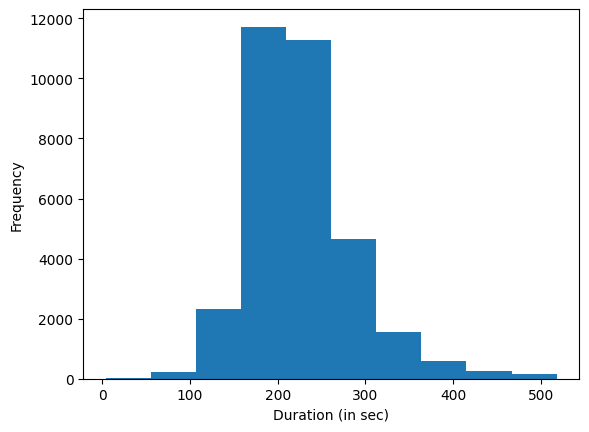

In [47]:
data["duration_sec"].plot(kind="hist")
plt.xlabel("Duration (in sec)")
plt.show()

<Axes: >

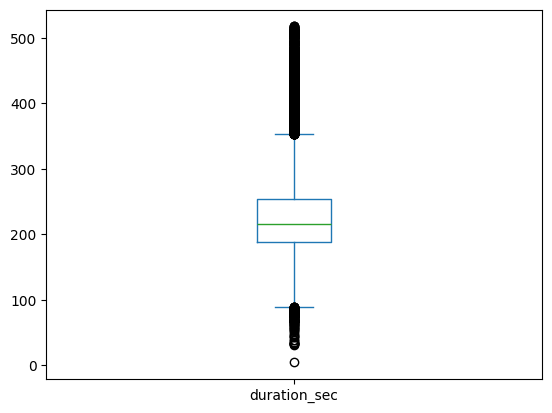

In [48]:
data["duration_sec"].plot(kind="box")

In [54]:
scaler = StandardScaler()
feature_data = scaler.fit_transform(data[["track_popularity", "loudness", "duration_sec", "tempo","energy", "danceability","valence","liveness"]])
similarity_matrix = cosine_similarity(feature_data)
similarity_matrix

array([[ 1.        ,  0.45105259,  0.93521627, ...,  0.08582281,
        -0.05436447, -0.22940035],
       [ 0.45105259,  1.        ,  0.59436166, ..., -0.29223008,
        -0.27895124,  0.05234862],
       [ 0.93521627,  0.59436166,  1.        , ...,  0.09742269,
        -0.19386169, -0.260958  ],
       ...,
       [ 0.08582281, -0.29223008,  0.09742269, ...,  1.        ,
         0.38893012,  0.16693377],
       [-0.05436447, -0.27895124, -0.19386169, ...,  0.38893012,
         1.        ,  0.7914148 ],
       [-0.22940035,  0.05234862, -0.260958  , ...,  0.16693377,
         0.7914148 ,  1.        ]])

In [62]:
def recommend_songs(song_title, num_recommendations=2):
    # Find the song index
    song_idx = data[data['track_name'] == song_title].index[0]
    
    # Get similarity scores
    similarity_scores = list(enumerate(similarity_matrix[song_idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get recommended song indices
    recommended_indices = [idx for idx, score in similarity_scores[1:num_recommendations + 1]]
    
    # Return recommended songs
    return data.iloc[recommended_indices][['track_name', 'track_artist', 'playlist_genre','playlist_subgenre']]


In [64]:
print(recommend_songs("I Don't Care", num_recommendations=2))

                          track_name track_artist playlist_genre  \
8566                          Outlaw      50 Cent            rap   
23892  Rewind (feat. Sophie Strauss)      Wingtip            r&b   

      playlist_subgenre  
8566       gangster rap  
23892           hip pop  
